In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### 1. Dataset
Load the prostate dataset. 

In [12]:
#TODO 
train = pd.read_csv('data/prostate_train.csv')
test = pd.read_csv('data/prostate_test.csv')

We will use the target $y=$lpsa throughout this exercise, and all other features as predictors $X$, so split the train and test sets by $X,y$.

In [14]:
#TODO
Xtrain, ytrain = train.drop(['lpsa'], axis=1), train['lpsa']
Xtest, ytest = test.drop(['lpsa'], axis=1), test['lpsa']

### 2. Ridge Regression
Perform Ridge regression with target lpsa and all other features as predictors. Do so for different regularization parameters $\lambda$.
Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.238, Fig. 6.4.

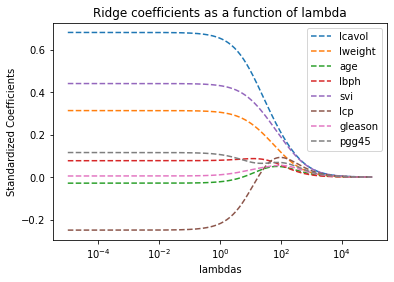

In [15]:
from sklearn.linear_model import Ridge
    
# This is an example of possible values for the lambda that you can consider.
lambdas = np.logspace(-5, 5, 200)

ridge = Ridge()
coefs = []

for l in lambdas:
    ridge.set_params(alpha=l)
    ridge.fit(Xtrain, ytrain)
    y_pred = ridge.predict(Xtest)
    coefs.append(ridge.coef_)

plt.plot(lambdas, coefs, '--', label = ['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45'])
plt.legend()
plt.xscale('log')
plt.xlabel('lambdas')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients as a function of lambda');

#### Observations
As λ increases, the ridge coefficient estimates shrink towards zero. When λ is extremely high values, then the coefficients of ridge become 0 and this thereby corresponds to the null model that contains 0 predictors.

### 3. Cross Validation & Ridge
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ for the ridge regression model.

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# K-fold cross validation
folds = 10

#TODO
kf = KFold(n_splits=folds)
ridge = Ridge()
mse_train = []
mse_test = []
best_lambda = 0
min_mse = float('inf')

for l in lambdas:
    ridge.set_params(alpha=l)
    mse_train.clear()
    mse_test.clear()
    
    for train_index , test_index in kf.split(Xtrain):
        X_train , X_test = Xtrain.iloc[train_index,:] , Xtrain.iloc[test_index,:]
        y_train , y_test = ytrain[train_index] , ytrain[test_index]

        ridge.fit(X_train, y_train)
        y_train_pred = ridge.predict(X_train)
        y_test_pred = ridge.predict(X_test)
        
        error_train = mean_squared_error(y_train, y_train_pred)
        mse_train.append(error_train)
        
        error_test = mean_squared_error(y_test, y_test_pred)
        mse_test.append(error_test)

    avg_mse_train = sum(mse_train)/folds
    avg_mse_test = sum(mse_test)/folds
    
    if avg_mse_test < min_mse:
        min_mse = avg_mse_test
        best_lambda = l
        
print("Best lambda value is - ", best_lambda)

Best lambda value is -  3.3700643292719317


Report train and test error measured in MSE for this $\lambda$.

In [17]:
ridge = Ridge(best_lambda)
ridge.fit(Xtrain, ytrain)

ytrain_pred = ridge.predict(Xtrain)
ytest_pred = ridge.predict(Xtest)

error_train = mean_squared_error(ytrain, ytrain_pred)
print("Mean squared error for train data - ", error_train)
        
error_test = mean_squared_error(ytest, ytest_pred)
print("Mean squared error for test data - ", error_test)

print("Coeffecients - ", ridge.coef_)

Mean squared error for train data -  0.4783320428402303
Mean squared error for test data -  0.44888734299565797
Coeffecients -  [ 0.60058741  0.28883206 -0.00918138  0.08317302  0.41029149 -0.16091381
  0.02044968  0.0902805 ]


### 4. Lasso Regression
Perform Lasso regression with target lpsa and all other features as predictors. Do so for different parameters $\lambda$.

Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.242, Fig. 6.6.

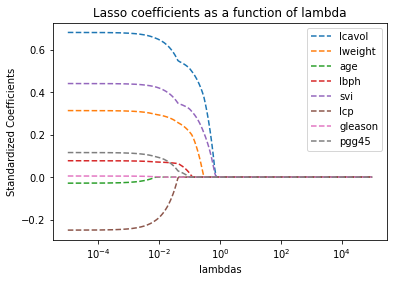

In [18]:
from sklearn.linear_model import Lasso
    
# This is an example of possible values for the lambda that you can consider.
lambdas = np.logspace(-5, 5, 200)

lasso = Lasso()
coefs = []

for l in lambdas:
    lasso.set_params(alpha=l)
    lasso.fit(Xtrain, ytrain)
    y_pred = lasso.predict(Xtest)
    coefs.append(lasso.coef_)

plt.plot(lambdas, coefs, '--', label = ['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45'])
plt.legend()
plt.xscale('log')
plt.xlabel('lambdas')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of lambda');

#### Observations
while in ridge regression, coeffecients value only approach towards zero whereas in lasso they actually become zero. <br>
When lambda value increases, the coeffecient value decreases.<br>
The features whose coefficients are the first to be shrunken to zero are the least important in
comparison to ones for which this happens later.

## 5. Cross Validation & Lasso
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ in the Lasso.
		Report train and test error measured in MSE for this $\lambda$. 

In [19]:
# K-fold cross validation
folds = 10

#TODO
kf = KFold(n_splits=folds)
lasso = Lasso()
mse_train = []
mse_test = []
best_lambda = 0
min_mse = float('inf')

for l in lambdas:
    lasso.set_params(alpha=l)
    mse_train.clear()
    mse_test.clear()
    
    for train_index , test_index in kf.split(Xtrain):
        X_train , X_test = Xtrain.iloc[train_index,:] , Xtrain.iloc[test_index,:]
        y_train , y_test = ytrain[train_index] , ytrain[test_index]

        lasso.fit(X_train, y_train)
        y_train_pred = lasso.predict(X_train)
        y_test_pred = lasso.predict(X_test)
        
        error_train = mean_squared_error(y_train, y_train_pred)
        mse_train.append(error_train)
        
        error_test = mean_squared_error(y_test, y_test_pred)
        mse_test.append(error_test)

    avg_mse_train = sum(mse_train)/folds
    avg_mse_test = sum(mse_test)/folds
    
    if avg_mse_test < min_mse:
        min_mse = avg_mse_test
        best_lambda = l
        
print("Best lambda value is - ", best_lambda)

Best lambda value is -  0.018464249428955443


In [20]:
lasso = Lasso(best_lambda)
lasso.fit(Xtrain, ytrain)

ytrain_pred = lasso.predict(Xtrain)
ytest_pred = lasso.predict(Xtest)

error_train = mean_squared_error(ytrain, ytrain_pred)
print("Mean squared error for train data - ", error_train)
        
error_test = mean_squared_error(ytest, ytest_pred)
print("Mean squared error for test data - ", error_test)

print("Coeffecients - ", lasso.coef_)

Mean squared error for train data -  0.479509380904524
Mean squared error for test data -  0.4509701538139852
Coeffecients -  [ 0.62109085  0.2829691   0.          0.06884726  0.40018445 -0.14017368
  0.          0.07594088]


How many and which features are used?
		Compare this to the coefficients determined for ridge regression in part 3 of this exercise.

The features used in Lasso are lcavol, lweight, lbph, svi, lcp, pgg45. <br>

<table>
  <tr>
    <th></th>
    <th>lcavol</th>
    <th>lweight</th>  
    <th>age</th>
    <th>lbph</th>
    <th>svi</th>
    <th>lcp</th>
    <th>gleason</th>
    <th>pgg45</th>
  </tr>
  <tr>
    <td>Lasso</td>
    <td>0.62109085</td>
    <td>0.2829691</td>
    <td>0.</td>
    <td>0.06884726</td>
    <td>0.40018445</td>
    <td>-0.14017368</td>
    <td>0.</td>
    <td>0.07594088</td>
  </tr>
  <tr>
    <td>Ridge</td>
    <td>0.60058741</td>
    <td>0.28883206</td>
    <td>-0.00918138</td>
    <td>0.08317302</td>
    <td>0.41029149</td>
    <td>-0.16091381</td>
    <td>0.02044968</td>
    <td>0.0902805</td>
  </tr>
</table>

## 6. 

Compare the performance, in terms of MSE, of the best models in parts 3. and 5. Which model would you choose and why? What alternative model could have been used?

Both models generate similar test MSE. However, we choose lasso as it is simpler because of less features as gleason isn't used at all.
Another model that can be chosen would be Elastic net which might seem like an ideal choice as it
combines both Lasso and Ridge regression.